In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('petrol_consumption.csv')

In [ ]:
dataset.head()


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
dataset = dataset.rename(columns={'Population_Driver_licence(%)':'Population_Driver_licence'})
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence,Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


**CLEAN THE DATA**

In [ ]:
dataset.isnull().sum()

,0
Petrol_tax,0
Average_income,0
Paved_Highways,0
Population_Driver_licence,0
Petrol_Consumption,0


In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.dtypes

,0
Petrol_tax,float64
Average_income,int64
Paved_Highways,int64
Population_Driver_licence,float64
Petrol_Consumption,int64


In [ ]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence,Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


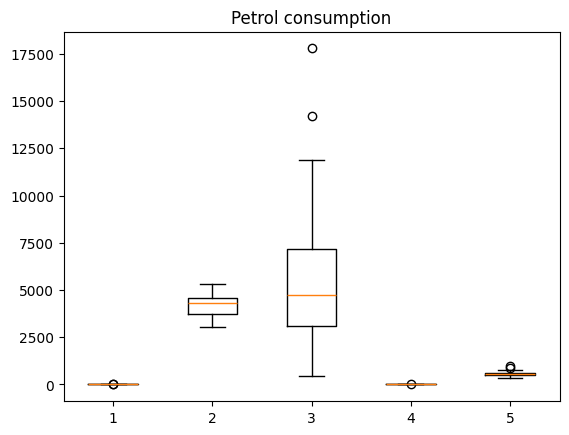

In [ ]:
plt.boxplot(dataset)
plt.title('Petrol consumption')
plt.show()

In [ ]:
Q3_Petrol_tax = dataset.Petrol_tax.quantile(0.75)
Q1_Petrol_tax = dataset.Petrol_tax.quantile(0.25)
IQR_Petrol_tax = Q3_Petrol_tax-Q1_Petrol_tax
upper_threshold_petrol_tax = Q3_Petrol_tax + 1.5*IQR_Petrol_tax
Lower_threshold_petrol_tax = Q1_Petrol_tax - 1.5*IQR_Petrol_tax
upper_threshold_petrol_tax,Lower_threshold_petrol_tax

(9.8125, 5.3125)

In [ ]:
Q3_Average_income = dataset.Average_income.quantile(0.75)
Q1_Average_income = dataset.Average_income.quantile(0.25)
IQR_Average_income = Q3_Average_income-Q1_Average_income
upper_threshold_Average_income = Q3_Average_income + 1.5*IQR_Average_income
Lower_threshold_Average_income = Q1_Average_income - 1.5*IQR_Average_income
upper_threshold_Average_income,Lower_threshold_Average_income

(5838.375, 2479.375)

In [ ]:
Q3_Paved_Highways = dataset.Paved_Highways.quantile(0.75)
Q1_Paved_Highways = dataset.Paved_Highways.quantile(0.25)
IQR_Paved_Highways = Q3_Paved_Highways-Q1_Paved_Highways
upper_threshold_Paved_Highways = Q3_Paved_Highways + 1.5*IQR_Paved_Highways
Lower_threshold_Paved_Highways = Q1_Paved_Highways - 1.5*IQR_Paved_Highways
upper_threshold_Paved_Highways,Lower_threshold_Paved_Highways

(13224.625, -2958.375)

In [ ]:
Q3_licence = dataset.Population_Driver_licence.quantile(0.75)
Q1_licence = dataset.Population_Driver_licence.quantile(0.25)
IQR_licence = Q3_licence-Q1_licence
upper_threshold_licence = Q3_licence + 1.5*IQR_licence
Lower_threshold_licence = Q1_licence - 1.5*IQR_licence
upper_threshold_licence,Lower_threshold_licence

(0.6934999999999998, 0.4315000000000002)

In [ ]:
dataset.shape

(48, 5)

**EDA**

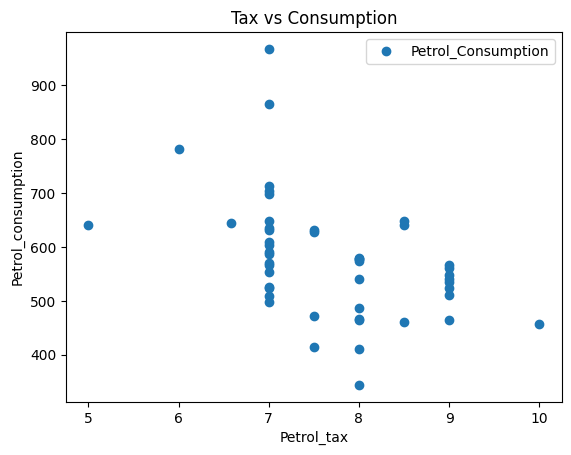

In [ ]:
dataset.plot(x='Petrol_tax',y='Petrol_Consumption',style='o')
plt.title('Tax vs Consumption')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_consumption')
plt.show()

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean()

,Petrol_Consumption
Petrol_tax,
5.00,640.000000
6.00,782.000000
6.58,644.000000
7.00,631.736842
7.50,536.000000
8.00,502.000000
8.50,582.666667
9.00,530.875000
10.00,457.000000


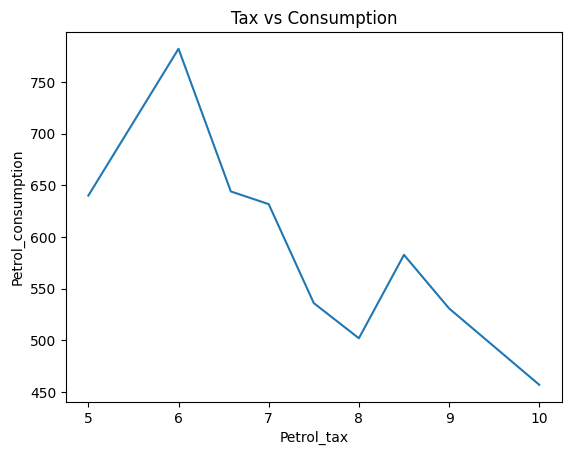

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
plt.title('Tax vs Consumption')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_consumption')
plt.show()

In [ ]:
dataset[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


#1) There is a linear relationship between tax and consumption
#2) As tax increases, consumption decreases which is in-line with our GK
#3) No transformation required

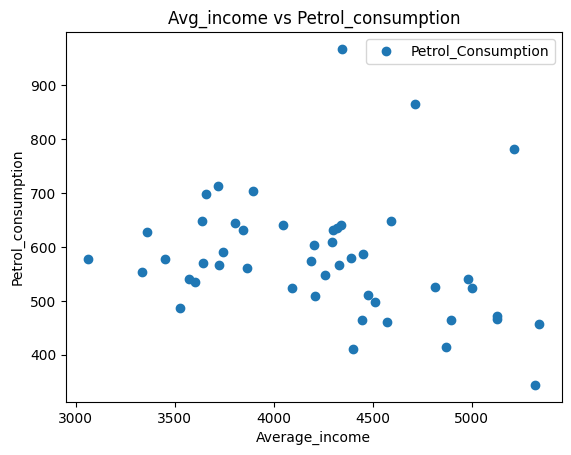

In [ ]:
dataset.plot(x='Average_income',y='Petrol_Consumption',style='o')
plt.title('Avg_income vs Petrol_consumption')
plt.xlabel('Average_income')
plt.ylabel('Petrol_consumption')
plt.show()


In [ ]:
dataset[['Average_income','Petrol_Consumption']].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


## 1) There is low linear relationship between the data
## 2) No transformation required
## 3) The direction of relationship is not in-line with our GK

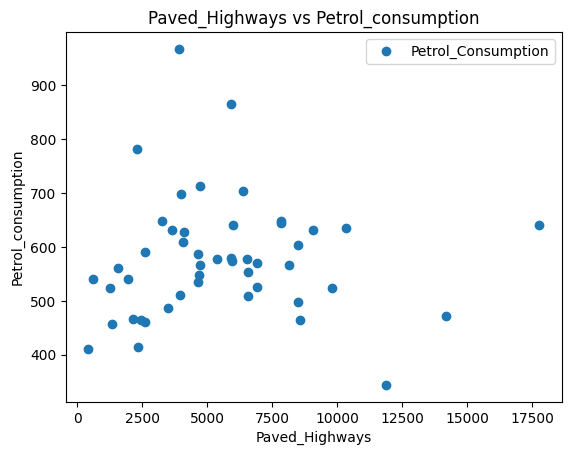

In [ ]:
dataset.plot(x='Paved_Highways',y='Petrol_Consumption',style='o')
plt.title('Paved_Highways vs Petrol_consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_consumption')
plt.show()

In [ ]:
dataset[['Paved_Highways','Petrol_Consumption']].corr()

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.019042
Petrol_Consumption,0.019042,1.000000


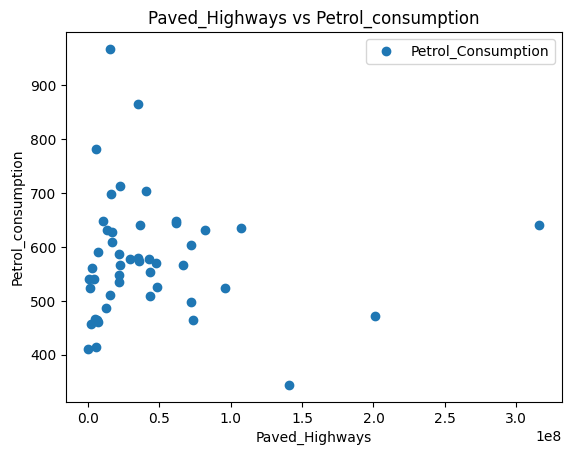

,transformed,Petrol_Consumption
transformed,1.000000,-0.046976
Petrol_Consumption,-0.046976,1.000000


In [ ]:
dataset['transformed'] = np.square(dataset['Paved_Highways'])
dataset.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.title('Paved_Highways vs Petrol_consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

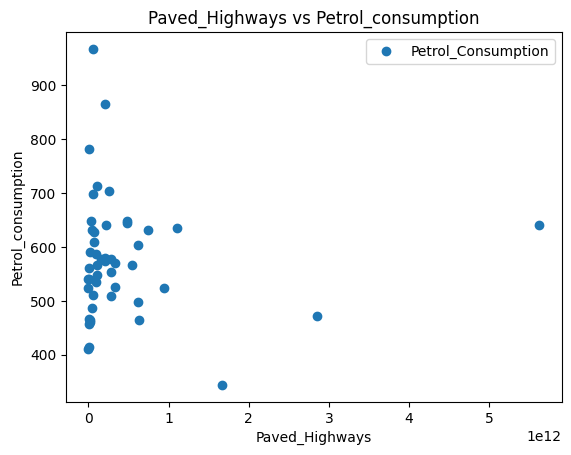

,transformed,Petrol_Consumption
transformed,1.000000,-0.046703
Petrol_Consumption,-0.046703,1.000000


In [ ]:
dataset['transformed'] = np.power(dataset['Paved_Highways'],3)
dataset.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.title('Paved_Highways vs Petrol_consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

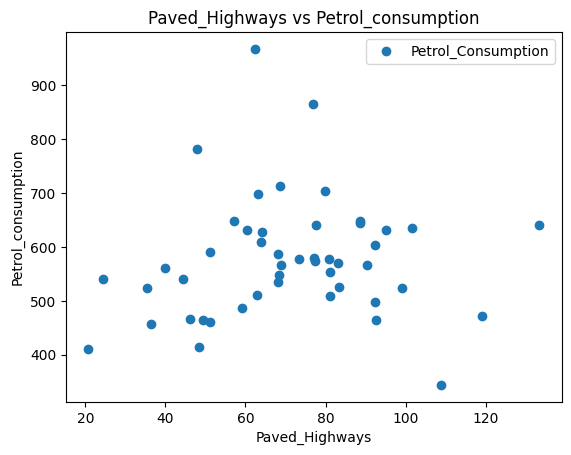

,transformed,Petrol_Consumption
transformed,1.000000,0.086698
Petrol_Consumption,0.086698,1.000000


In [ ]:
dataset['transformed'] = np.power(dataset['Paved_Highways'],0.5)
dataset.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.title('Paved_Highways vs Petrol_consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


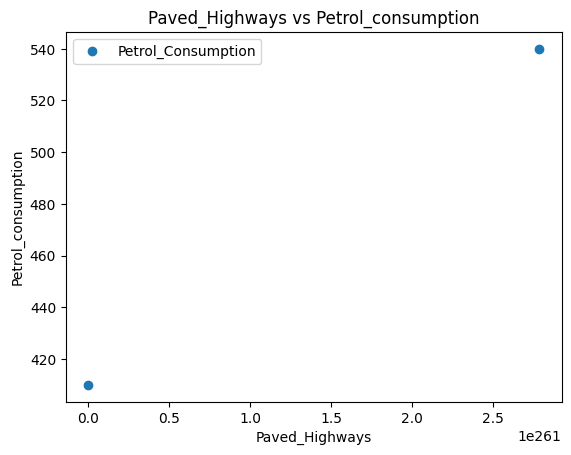

,transformed,Petrol_Consumption
transformed,NaN,0.0
Petrol_Consumption,0.0,1.0


In [ ]:
dataset['transformed'] = np.exp(dataset['Paved_Highways'])
dataset.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.title('Paved_Highways vs Petrol_consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

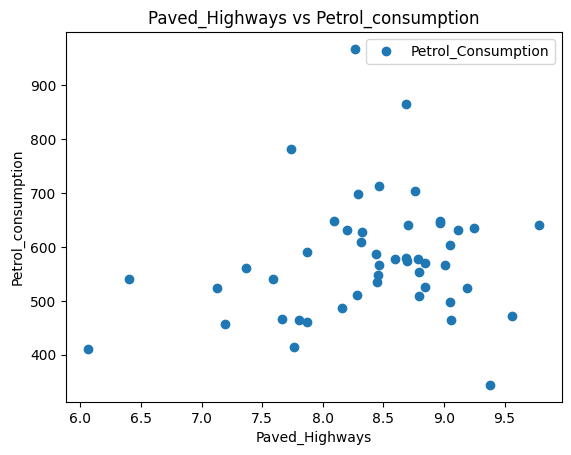

,transformed,Petrol_Consumption
transformed,1.000000,0.165384
Petrol_Consumption,0.165384,1.000000


In [ ]:
dataset['transformed'] = np.log(dataset['Paved_Highways'])
dataset.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.title('Paved_Highways vs Petrol_consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

# 1)There is no linear relationship between paved_highways and petrol_consumption
# 2)Have tried all the transformation-still not able to see a good linear relationship
# 3)Have decided to drop the feature

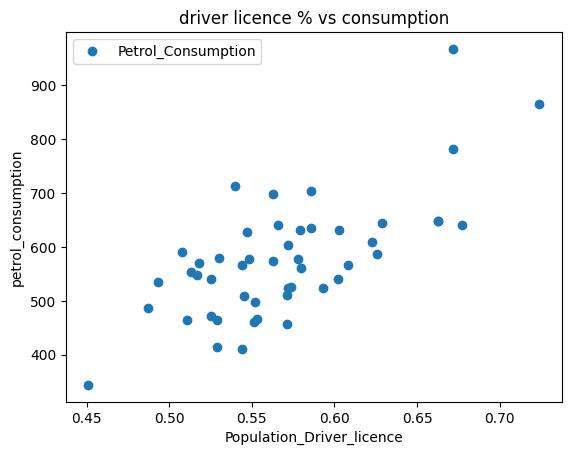

,Population_Driver_licence,Petrol_Consumption
Population_Driver_licence,1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


In [ ]:
dataset.plot(x='Population_Driver_licence',y='Petrol_Consumption',style='o')
plt.title('driver licence % vs consumption')
plt.xlabel('Population_Driver_licence')
plt.ylabel('petrol_consumption')
plt.show()
dataset[['Population_Driver_licence','Petrol_Consumption']].corr()

# 1) High correlation between the data
# 2) No transformation required

In [ ]:
x = dataset[['Average_income','Petrol_tax','Population_Driver_licence']].values
y = dataset['Petrol_Consumption'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax','Average_income','Population_driver_licence'],columns=['coefficient'])

In [ ]:
coeff_df

,coefficient
Petrol_tax,-40.684602
Average_income,-31.818964
Population_driver_licence,81.460766


In [ ]:
regressor.intercept_

582.842105263158

In [ ]:
# petrol_consumption = -31*scaled_petrol_tax - 28*scaled_avg_income + 85*scaled_pop_driver + 577

In [ ]:
y_pred = regressor.predict(x_test_scaled)

In [ ]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,610,668.586391
1,487,493.840759
2,632,639.692529
3,464,488.363152
4,628,609.360274
5,457,414.613957
6,547,449.688277
7,580,493.788256
8,571,565.186418
9,561,567.839217


In [ ]:
from sklearn import metrics
print('R2-score:',metrics.r2_score(y_test,y_pred))

R2-score: 0.3839796922859994


**Feature Selection**

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select=3,step=1)
selector = selector.fit(x_train_scaled,y_train)
list(zip(['Petrol_tax','Average_income','Paved_Highways','Population_driver_licence'],selector.support_))

[('Petrol_tax', True), ('Average_income', True), ('Paved_Highways', True)]